# Exploratory Data Analysis

This initial exploration of data is done in order to study all the features and their impact on the target or prediction. To make this step more efficient and comprehensible, a subset of all data will be studied.

In [1]:
from financial_functions import *
from visualization_functions import *
from eda_functions import *

## Initial Exploration

In [2]:
path = '../data/historical/'
mack = import_single_file(path, symbol='MACK')

In [3]:
mack.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-08-14 to 2022-08-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1259 non-null   float64
 1   Close      1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Open       1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


As can be seen, our data is a Time series, whose index is of type DatetimeIndex, and columns are of type float. Additionally, there are no null values in this particular company's data, however, other files may contain null values.

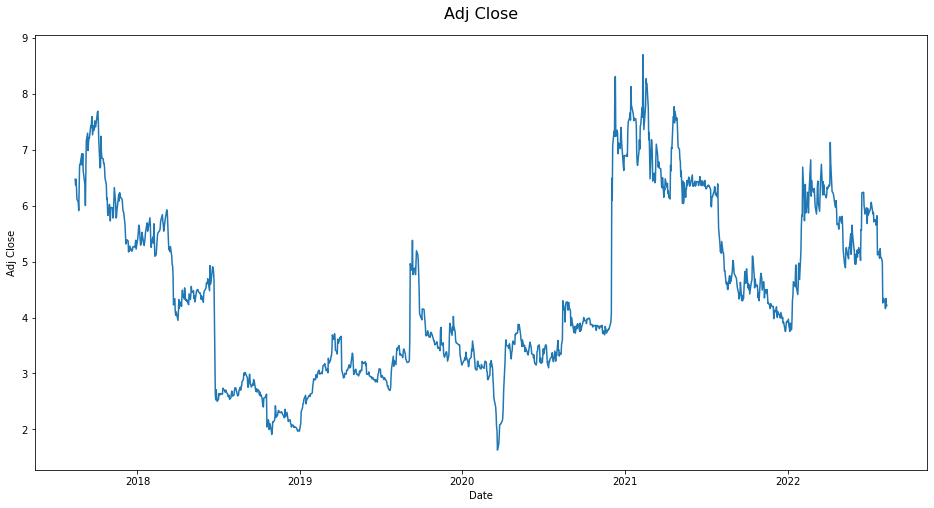

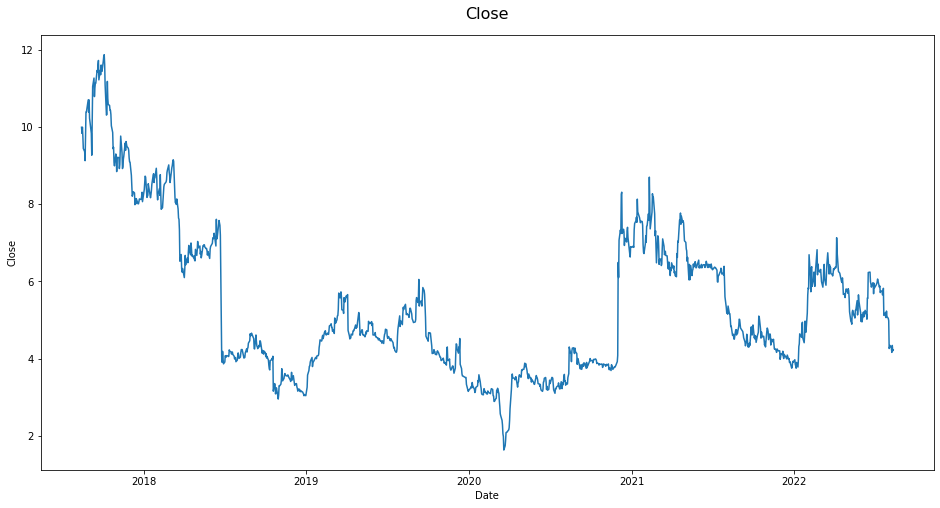

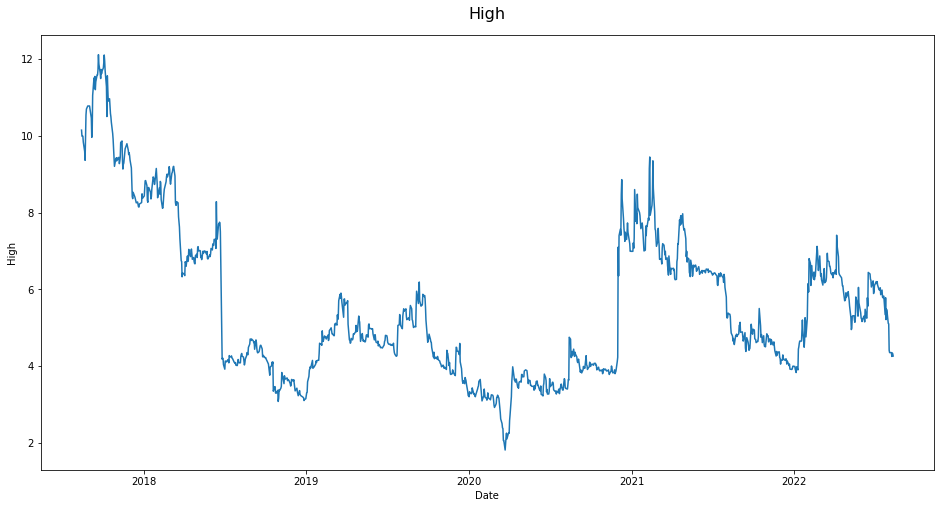

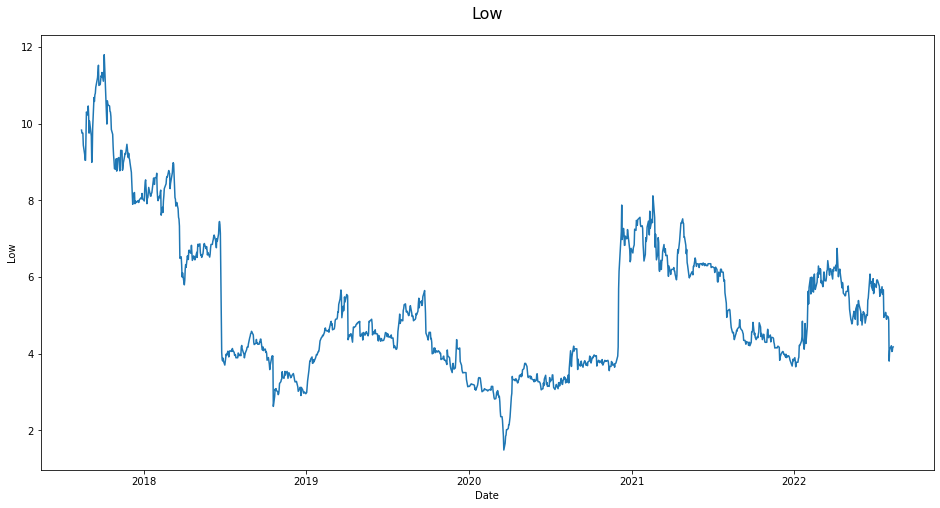

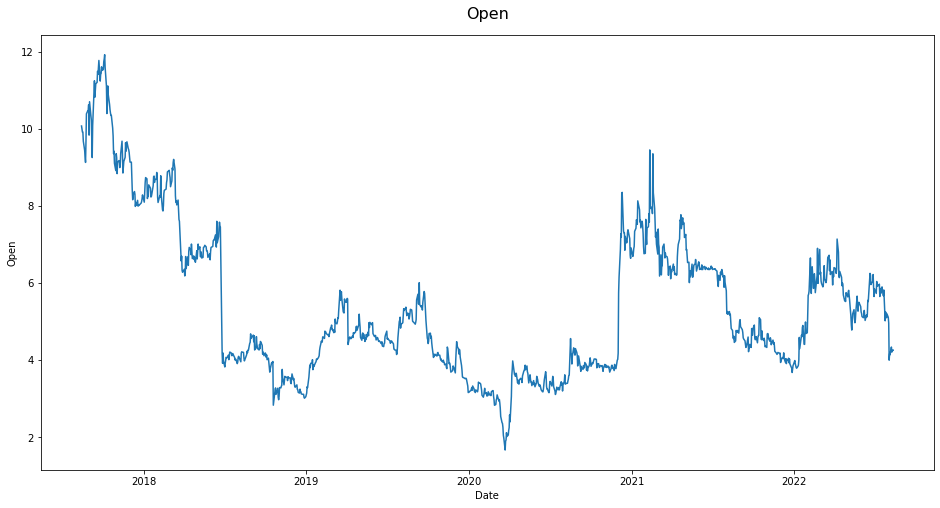

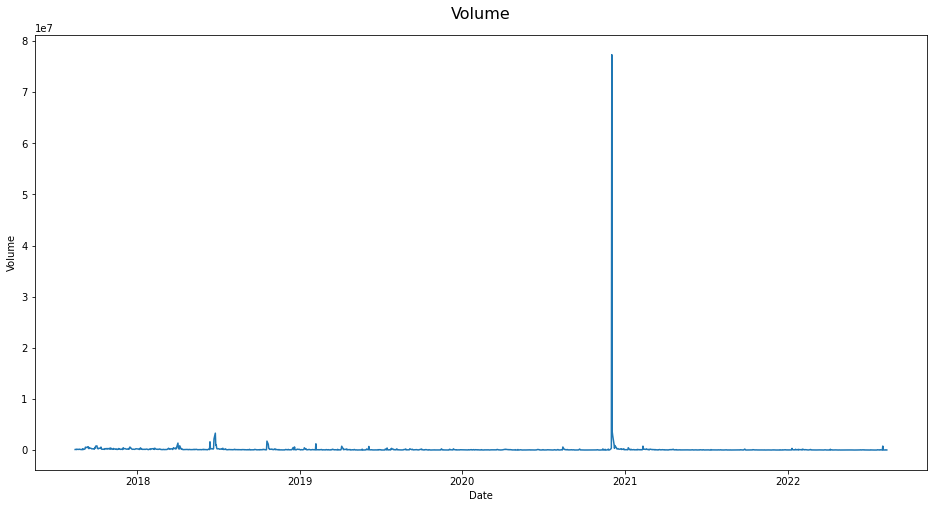

In [4]:
for col in mack.columns:
    plot_feature(mack, col)

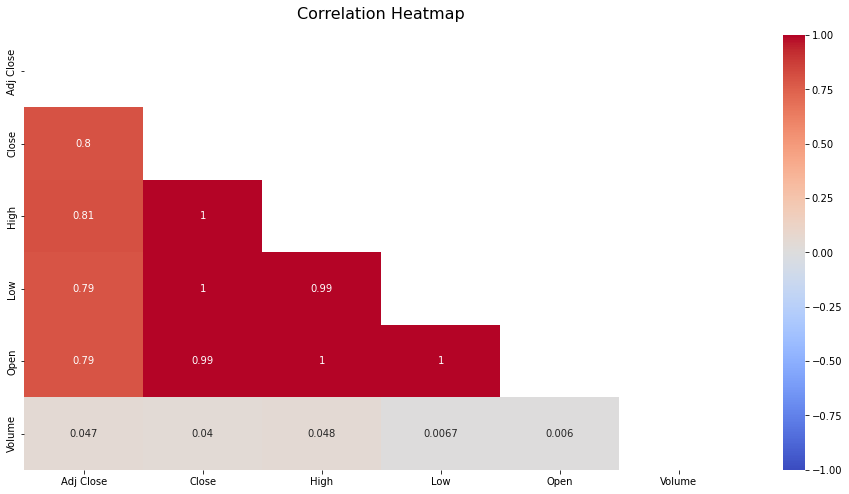

In [5]:
plot_correlations(mack)

The illustration above reveals that 4 columns, namely Close, High, Low, and Open, are highly correlated, which might be problematic in the future. To prevent any issues, only one of these columns, Close, will be taken into consideration.

In [7]:
mack = drop_correlated_columns(mack)